In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv('train.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df = df[~df.Embarked.isna()]
passenger_df = df.drop(['PassengerId', 'Pclass', 'Name', 'Cabin', 'Ticket'], axis=1)
passenger_df = pd.get_dummies(passenger_df, columns=['Sex', 'Embarked'])

In [27]:
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_female  889 non-null    uint8  
 6   Sex_male    889 non-null    uint8  
 7   Embarked_C  889 non-null    uint8  
 8   Embarked_Q  889 non-null    uint8  
 9   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


In [29]:
passenger_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1


In [30]:
X = passenger_df

#### Clustering
Using K-Means, I will check the inertia to determine the # of clusters. Next I will determine what each cluster seems to be telling me about the data

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

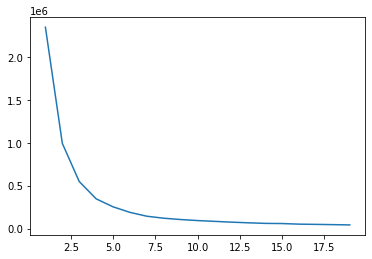

In [38]:
inert = []
for i in range(1,20):
    inert.append(KMeans(n_clusters=i).fit(X).inertia_)
plt.plot(range(1,20), inert)

In [41]:
# 5 is the best number of clusters based on inertia

km = KMeans(n_clusters = 5)
clusters = km.fit_predict(X)
df['Clusters'] = clusters

C:\Users\Emilio\AppData\Local\Temp/ipykernel_440/4140445009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = clusters


C:\Users\Emilio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


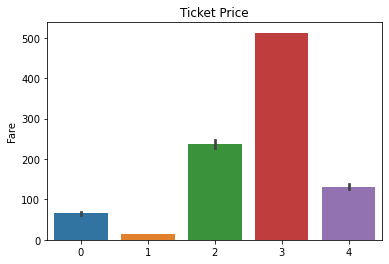

In [52]:
sns.barplot(clusters, df['Fare']).set_title('Ticket Price');

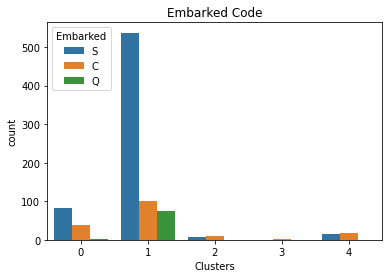

In [50]:
sns.countplot(data=df, x='Clusters', hue='Embarked').set_title('Embarked Code');

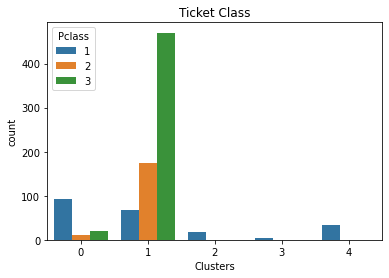

In [51]:
sns.countplot(data=df, x='Clusters', hue='Pclass').set_title('Ticket Class');

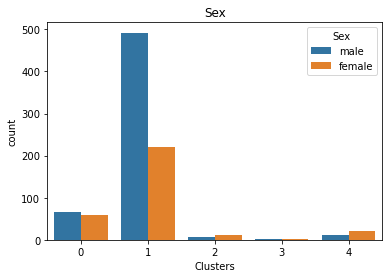

In [53]:
sns.countplot(data=df, x='Clusters', hue='Sex').set_title('Sex');

C:\Users\Emilio\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


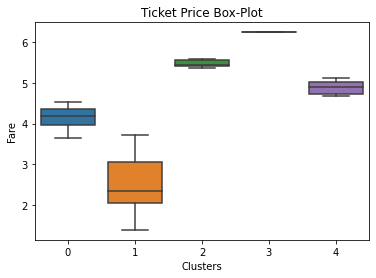

In [54]:
sns.boxplot(x=df['Clusters'], y=np.log(df.Fare)).set_title('Ticket Price Box-Plot');

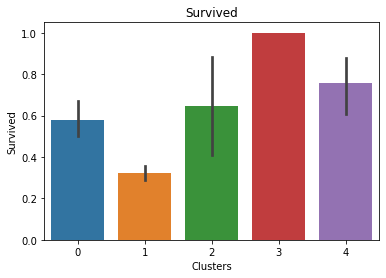

In [55]:
sns.barplot(x=df['Clusters'], y=df['Survived']).set_title('Survived');

In [56]:
df['Clusters'].value_counts()

1    712
0    124
4     33
2     17
3      3
Name: Clusters, dtype: int64